In [35]:
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2

from keras.datasets import fashion_mnist
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.optimizers import Adam

In [ ]:
def get_label(input_class):
  num = int(input_class)
  if num == 0:
    return "T-Shirt/Top"
  elif num == 1:
    return "Trouser"
  elif num == 2:
    return "Pullover"
  elif num == 3:
    return "Dress"
  elif num == 4:
    return "Coat"
  elif num == 5:
    return "Sandal"
  elif num == 6:
    return "Shirt"
  elif num == 7:
    return "Sneakers"
  elif num == 8:
    return "Bag"
  elif num == 9:
    return "Ankle Boot"

In [37]:
(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data()

In [38]:
print("The size of X_train is: {} and Y_train is: {}".format(X_train.shape,y_train.shape))

The size of X_train is: (60000, 28, 28) and Y_train is: (60000,)


<Figure size 432x288 with 0 Axes>

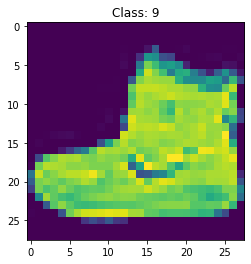

<Figure size 432x288 with 0 Axes>

In [39]:
plt.imshow(X_train[0])
plt.title('Class: {}'.format(y_train[0]))
plt.figure()

In [40]:
#preprocessing for the dataset
inp_shape = 28
batch_size = 32
#10 classes for the dataset
n_class = 10

input_shape = (inp_shape, inp_shape,1)

#normalization of the image
X_train = X_train/255
X_train = X_train.astype(np.float)

X_test = X_test/255
X_test = X_test.astype(np.float)

In [41]:
X_train.shape

(60000, 28, 28)

In [42]:
#changing the model to fit into the CNN model
X_train = X_train.reshape(X_train.shape[0], inp_shape, inp_shape, 1)
X_test = X_test.reshape(X_test.shape[0], inp_shape, inp_shape, 1)

In [43]:
X_train.shape

(60000, 28, 28, 1)

In [44]:
y_train = to_categorical(y_train, n_class)
y_test = to_categorical(y_test, n_class)

In [45]:
y_train.shape

(60000, 10)

In [46]:
#Adding the CNN model
model = Sequential()

#First Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape = input_shape))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#2nd Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#3rd Convolutional Layer
model.add(Conv2D(filters=50, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units = 1024, activation = "relu"))
model.add(Dense(units = 128, activation = "relu"))

model.add(Dense(units = n_class, activation = "softmax"))

In [47]:
model.compile(Adam(lr = 0.001), loss = "categorical_crossentropy", metrics = ["acc"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 2, 2, 50)         

In [48]:
h = model.fit(X_train, y_train, validation_split = 0.2, epochs = 10, verbose = 1, batch_size = batch_size, shuffle = True)


Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.8338 - acc: 0.6779 - val_loss: 0.3888 - val_acc: 0.8577
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3638 - acc: 0.8667 - val_loss: 0.3272 - val_acc: 0.8793
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2889 - acc: 0.8936 - val_loss: 0.2939 - val_acc: 0.8978
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2481 - acc: 0.9097 - val_loss: 0.2890 - val_acc: 0.8975
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2276 - acc: 0.9176 - val_loss: 0.2736 - val_acc: 0.9027
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2078 - acc: 0.9246 - val_loss: 0.2684 - val_acc: 0.9097
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1933 - acc: 0.9285 - val_loss: 0.2517 - val_acc: 0.9133
Epoch 8/10
1500/1500 [==============================] - 7s 5ms

In [49]:
score = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2988 - acc: 0.9007


In [50]:
print("Test Loss is: ", score[0])
print("Test Accuracy is: ", score[1])

Test Loss is:  0.29879438877105713
Test Accuracy is:  0.9006999731063843


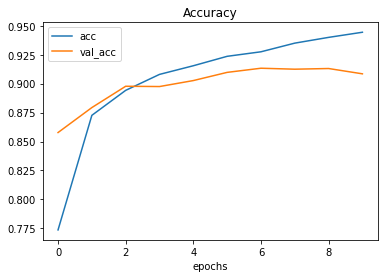

In [51]:
plt.plot(h.history["acc"])
plt.plot(h.history["val_acc"])
plt.xlabel("epochs")
plt.legend(["acc","val_acc"])
plt.title("Accuracy")
plt.show()

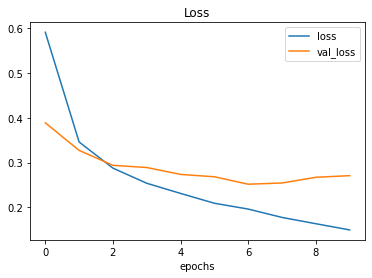

In [52]:
plt.plot(h.history["loss"])
plt.plot(h.history["val_loss"])
plt.xlabel("epochs")
plt.legend(["loss","val_loss"])
plt.title("Loss")
plt.show()


 1


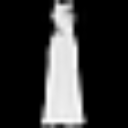

Actual Class: Dress
Predicted Class: Dress

 2


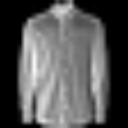

Actual Class: Shirt
Predicted Class: Shirt

 3


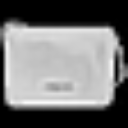

Actual Class: Bag
Predicted Class: Bag

 4


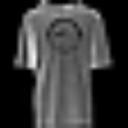

Actual Class: T-Shirt/Top
Predicted Class: Shirt

 5


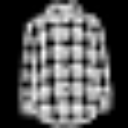

Actual Class: Shirt
Predicted Class: Shirt

 6


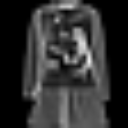

Actual Class: Dress
Predicted Class: Dress

 7


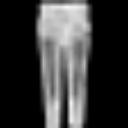

Actual Class: Trouser
Predicted Class: Trouser

 8


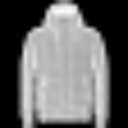

Actual Class: Coat
Predicted Class: Coat

 9


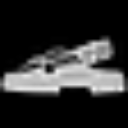

Actual Class: Sandal
Predicted Class: Sandal

 10


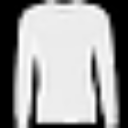

Actual Class: Pullover
Predicted Class: Pullover


In [84]:
from google.colab.patches import cv2_imshow

for i in range(0,10):
  print("\n "+str(i+1))
  random_num = np.random.randint(0, len(X_test))
  input_im =  X_test[random_num]

  the_image = input_im*255
  the_image = cv2. resize(the_image, (128, 128))
  cv2_imshow(the_image)

  actual = y_test[random_num].argmax(axis=0)
  imageL = cv2.resize(input_im, None, fx = 10, fy = 10, interpolation = cv2.INTER_CUBIC)
  input_im = input_im.reshape(1,28,28,1)
  res = str(np.argmax(model.predict(input_im), axis=-1)[0])
  print("Actual Class:", get_label(actual))
  print("Predicted Class:", get_label(res))